In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Preprocess input data
df = pd.read_csv("processedWithHeader.cleveland.data",header=0)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
#to check that the input data has some weird values.
for col in df.columns:
    print(str(col))
    print(df[col].unique())
    print(df[col].dtype)

age
[63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
float64
sex
[1. 0.]
float64
cp
[1. 4. 3. 2.]
float64
trestbps
[145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
float64
chol
[233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 

In [4]:
(df == "?").any()
df = df[(df != "?").all(axis=1)]
#there is some missing values, which are wrote as question mark. So i have removed all that
df.thal = df.thal.astype('float')
df.ca = df.ca.astype('float')

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


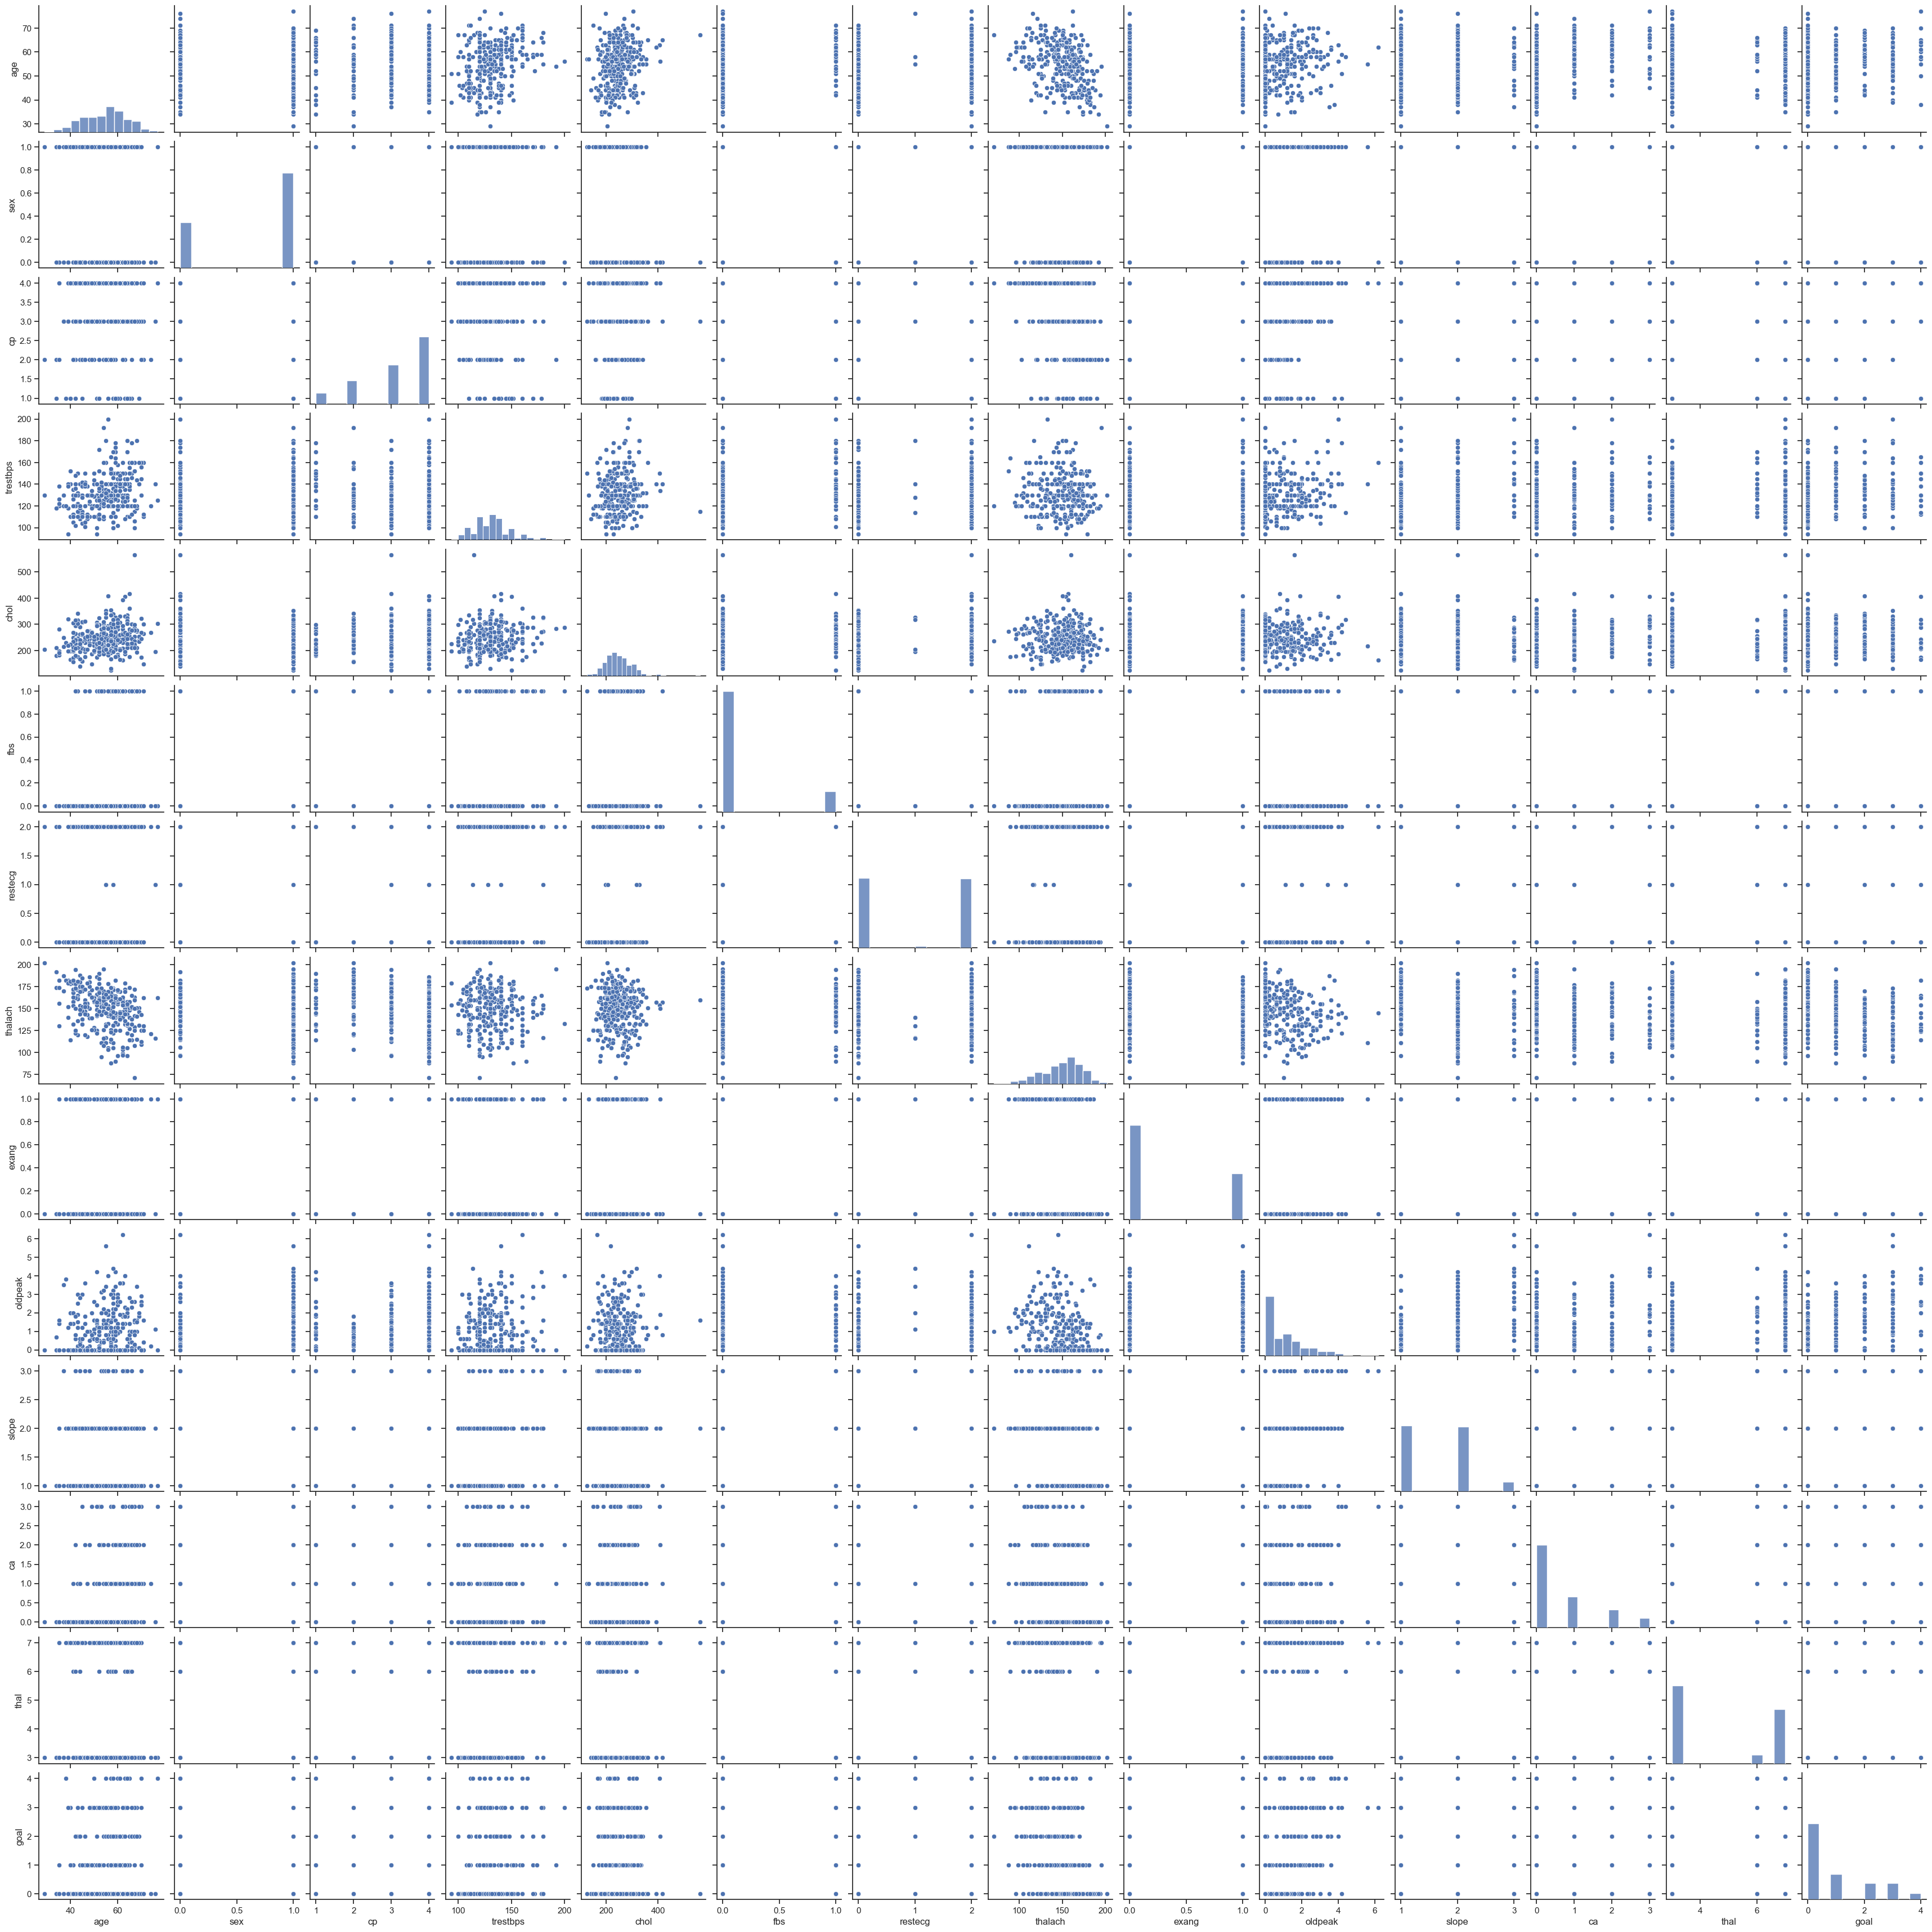

In [6]:
sb.set(style='ticks', color_codes=True)
sb.pairplot(df)

In [7]:
#let see the correlation matrix 
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


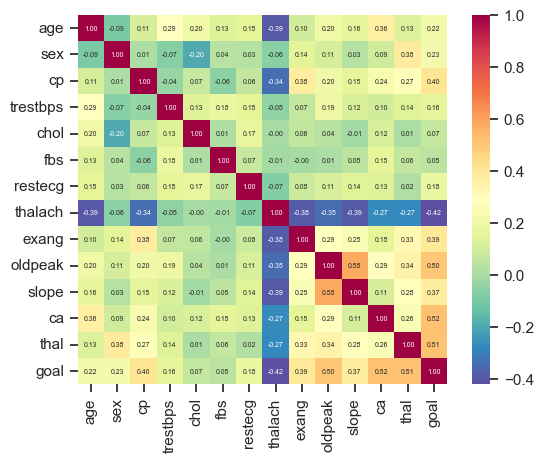

In [8]:
corrmat = df.corr()
hm = sb.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 5}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

In [9]:
df.iloc[:,:-1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0


In [10]:
#create Train and Test set
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=0.3, random_state=42, shuffle=True)

In [11]:
nb = GaussianNB()
nb.fit(x_train,y_train)
acc = nb.score(x_test,y_test)

In [12]:
y_pred = nb.predict(x_test)

In [13]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[44,  4,  0,  0,  1],
       [ 5,  3,  1,  1,  7],
       [ 0,  2,  1,  0,  7],
       [ 1,  1,  2,  0,  7],
       [ 0,  2,  0,  0,  1]], dtype=int64)

<AxesSubplot:>

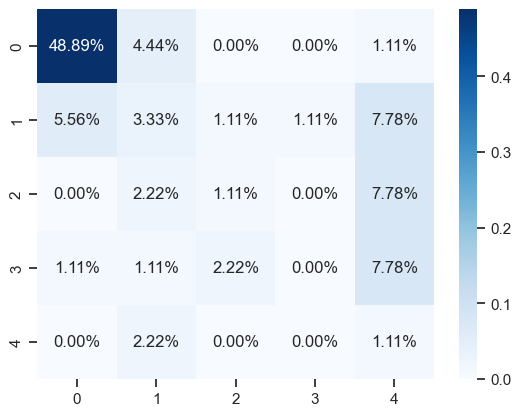

In [14]:
sb.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.25      0.18      0.21        17
           2       0.25      0.10      0.14        10
           3       0.00      0.00      0.00        11
           4       0.04      0.33      0.08         3

    accuracy                           0.54        90
   macro avg       0.28      0.30      0.26        90
weighted avg       0.56      0.54      0.54        90



In [16]:
cf,cf[1,2]

(array([[44,  4,  0,  0,  1],
        [ 5,  3,  1,  1,  7],
        [ 0,  2,  1,  0,  7],
        [ 1,  1,  2,  0,  7],
        [ 0,  2,  0,  0,  1]], dtype=int64),
 1)

In [17]:
#calculate Specitifity and Sensitivity
def calculate_spec_sens(cf):
    spec=[]*len(cf)
    sens=[]*len(cf)
    sum_cf = cf.sum(axis=(0,1))
    for i in range(len(cf)):
        TP = cf[i,i]
        TN = sum_cf - cf[:,i].sum() - cf[i,:].sum() + TP
        FN = cf[i,:].sum() - TP
        FP = cf[:,i].sum() - TP
        temp_spec = TN/(TN+FP)
        temp_sens = TP/(TP+FN)
        sens.append(temp_sens)
        spec.append(temp_spec)
    avg_spec = sum(spec)/len(cf)
    avg_sens = sum(sens)/len(cf)
    return avg_spec,avg_sens
    #for sensitivity we can use precision

In [18]:
avg_spec,avg_sens = calculate_spec_sens(cf)

In [19]:
acc,avg_sens,avg_spec

(0.5444444444444444, 0.30155262104841934, 0.8854678148571994)

<BarContainer object of 3 artists>

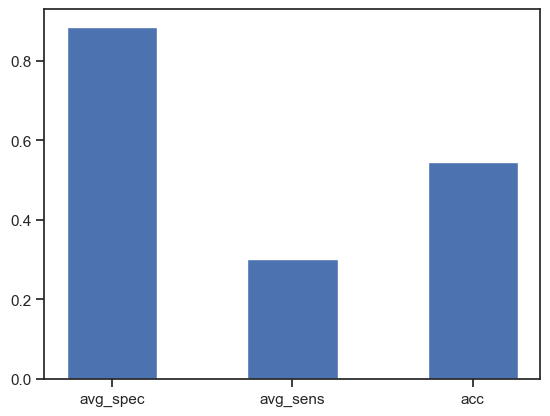

In [20]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[avg_spec,avg_sens,acc], width=0.5,
        tick_label=['avg_spec','avg_sens','acc'], align='center')

In [21]:
y_train.loc[y_train > 0] = 1
y_test.loc[y_test > 0] = 1 
nb = GaussianNB()
nb.fit(x_train,y_train)
acc = nb.score(x_test,y_test)
y_pred = nb.predict(x_test)
cf = confusion_matrix(y_test,y_pred)
cf

array([[46,  3],
       [ 6, 35]], dtype=int64)

In [27]:
spec=35/(35+3)
sens= 46/(46+6)

In [28]:
spec,sens,acc

(0.9210526315789473, 0.8846153846153846, 0.9)

<BarContainer object of 3 artists>

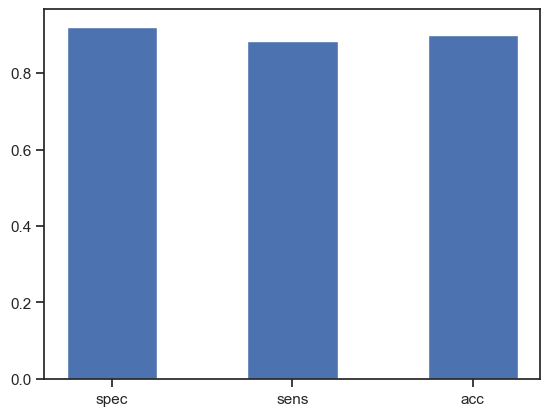

In [29]:
fig,ax = plt.subplots()
ax.bar([1,2,3],[spec,sens,acc], width=0.5,
        tick_label=['spec','sens','acc'], align='center')

In [30]:
#ROC curve
fpr,tpr,_ = roc_curve(y_test,y_pred)
auc = roc_auc_score(y_test,y_pred)

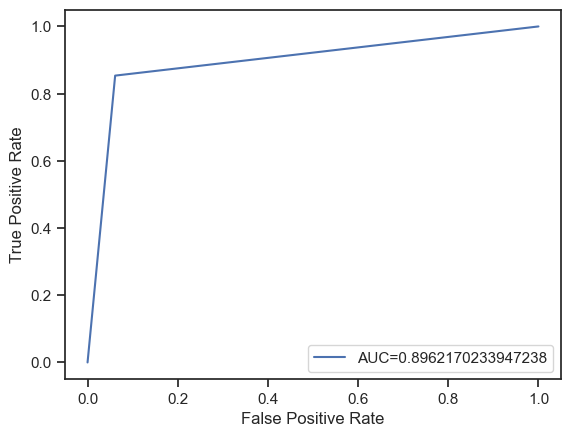

In [31]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()